In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def normalize(depth_image):
    max = depth_image.max()
    ratio = 255/max
    result = depth_image * ratio
    return result.astype('uint8')

In [3]:
color_images = []
depth_images = []

for i in range(31):
    color_image = cv2.imread("color_frames/color_image" + str(700+i) + ".png", cv2.IMREAD_COLOR)
    color_images.append(color_image)

for j in range(31):
    depth_image = cv2.imread("depth_frames/depth_image" + str(429+j) + ".png", cv2.IMREAD_UNCHANGED)
    depth_images.append(depth_image)

    max = depth_image.max()
    ratio = 255/max
    depth_image_gray = depth_image * ratio
    cv2.imwrite("depth_frames_gray/depth_image_gray" + str(429+j) + ".png", depth_image_gray)
    
print(len(color_images))
print(len(depth_images))

31
31


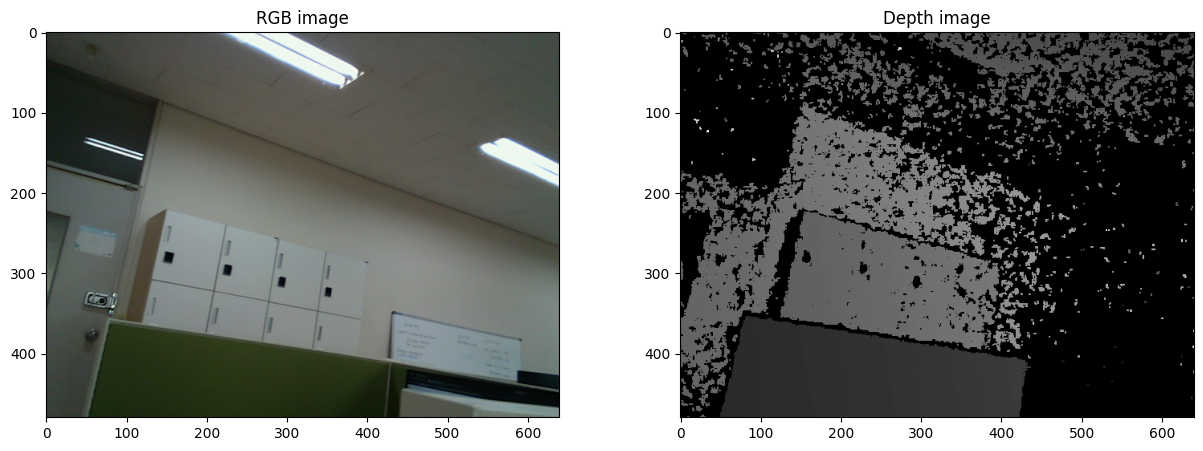

In [4]:
color_image = color_images[0]
depth_image = depth_images[0]

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
axs[0].set_title("RGB image")
axs[1].imshow(depth_image, cmap='gray')
axs[1].set_title("Depth image")
plt.show()


In [5]:
def get_right_image(color_image, depth_image):
    # Basic information
    focal_length = 604  # f_x = 603.838, f_y = 604.019
    baseline = 10  # 10mm
    right_image = np.zeros_like(color_image)

    # Calculate the right image
    for row in range(480):
        for col in range(640):
            depth = depth_image[row, col]  # mm
            if depth:
                disparity = focal_length * baseline // depth
                
                if (col - disparity > 0):
                    right_image[row, col - disparity] = color_image[row, col]
    return right_image

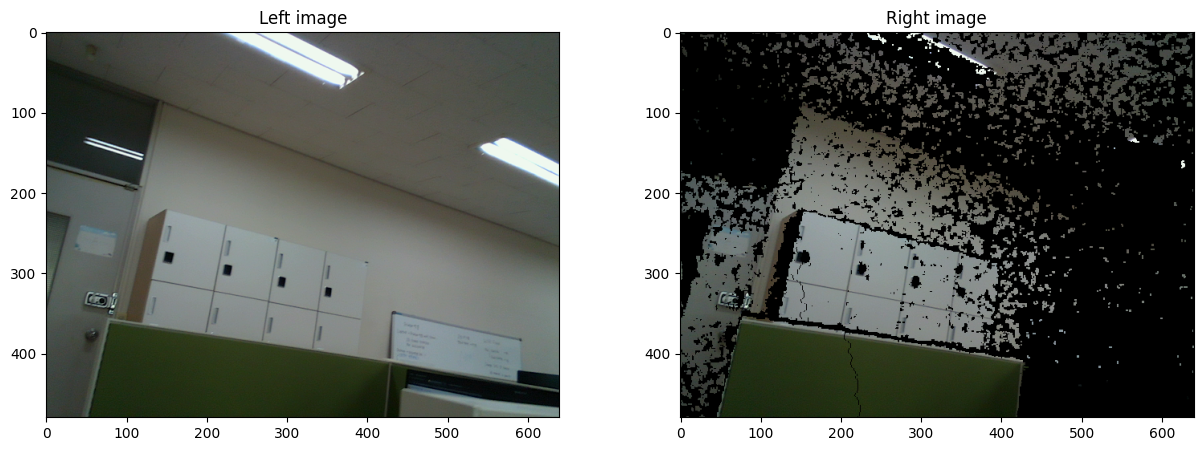

In [9]:
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
right_image = get_right_image(color_image_rgb, depth_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(color_image_rgb)
axs[0].set_title("Left image")
axs[1].imshow(right_image)
axs[1].set_title("Right image")
plt.show()

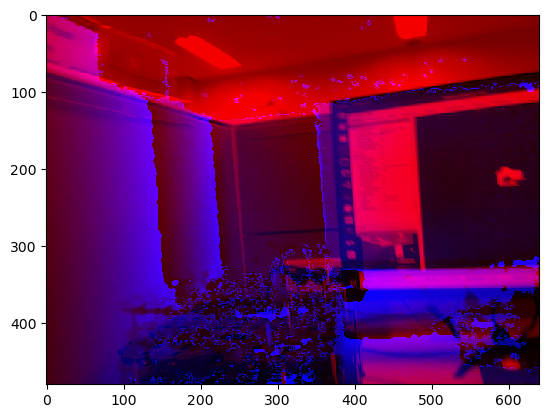

In [149]:
compare_image = np.zeros_like(color_image)
compare_image[:,:,0] = cv2.cvtColor(color_image, cv2.COLOR_RGB2GRAY)
compare_image[:,:,2] = resized_depth_image

plt.imshow(compare_image)
plt.show()